In [1]:
import pandas  as pd
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")




In [2]:
test = pd.read_excel('DATA/Titanic_Survival_Test.xls',index_col=0,header=0)
train =pd.read_excel('DATA/Titanic_Survival_Train.xls',index_col=0,header=0)
print(test.shape)
print(train.shape)

(21, 11)
(891, 11)


In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 2:EDA

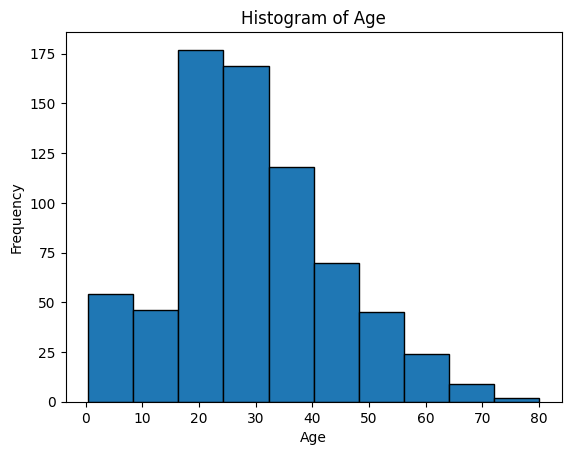

In [4]:
import matplotlib.pyplot as plt

age_data = train['Age'].dropna() 

# Plot histogram
plt.hist(age_data, bins=10, edgecolor='black')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show the plot
plt.show()


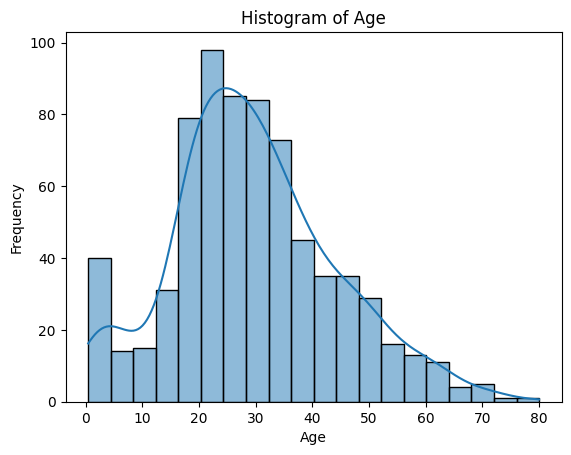

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'train'
sns.histplot(data=train, x='Age', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show the plot
plt.show()


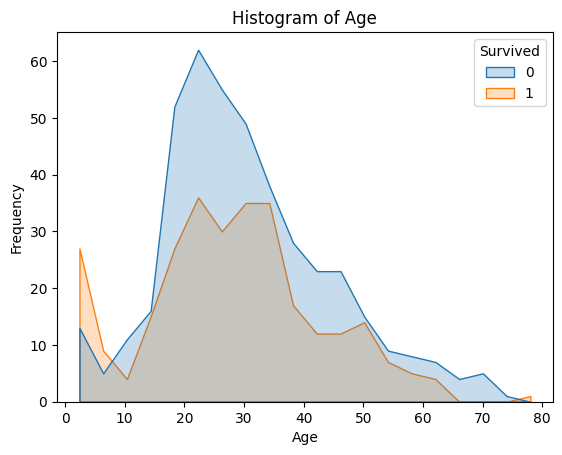

In [6]:

sns.histplot(data=train, x='Age', kde=False,
            hue='Survived',element='poly')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show the plot
plt.show()


In [7]:
def create_piechart(data, column):
    """
    Create a pie chart for a categorical variable present in a Pandas DataFrame.
    
    Parameters:
    - data: Pandas DataFrame containing the data.
    - column: Name of the column to create the pie chart.
    
    Returns:
    - None (the pie chart is displayed).
    """
    labels = list(data[column].value_counts().to_dict().keys())
    sizes = list(data[column].value_counts().to_dict().values())

    plt.pie(sizes,
            labels=labels,
            autopct='%1.2f%%',
            shadow=False,
            startangle=45)

    plt.axis('equal')
    plt.title("Pie Chart for " + column)
    plt.show()

def check_missing_value(data):
    """
    Objective: Check missing value count and percentage in all columns
    data: input data frame
    return: Missing value data frame
    """
    
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data

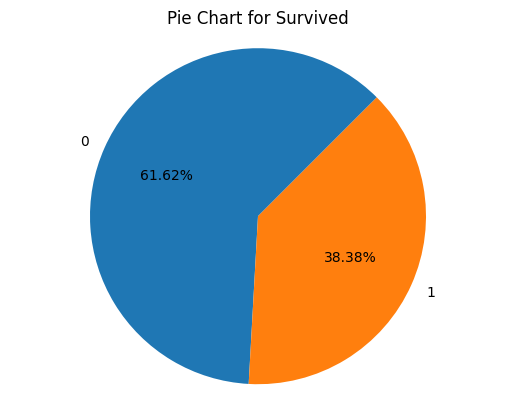

In [8]:
create_piechart(train,'Survived')

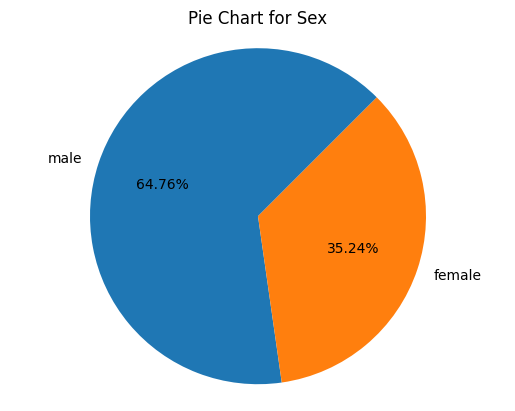

In [9]:
create_piechart(train,'Sex')

In [10]:
check_missing_value(train)

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


In [11]:
train.isnull().mean()*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

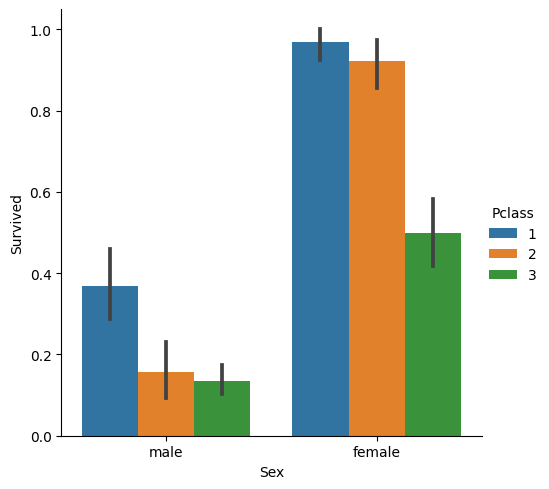

In [12]:
sns.catplot(data=train,x='Sex',y='Survived',hue='Pclass',kind='bar')
plt.show()

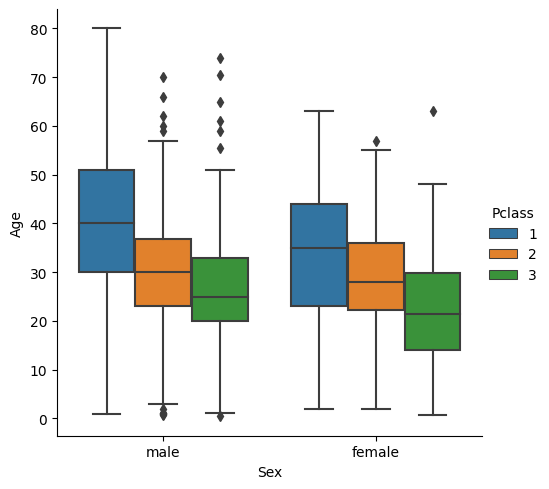

In [13]:
sns.catplot(data=train,x='Sex',y='Age',hue='Pclass',kind='box')
plt.show()

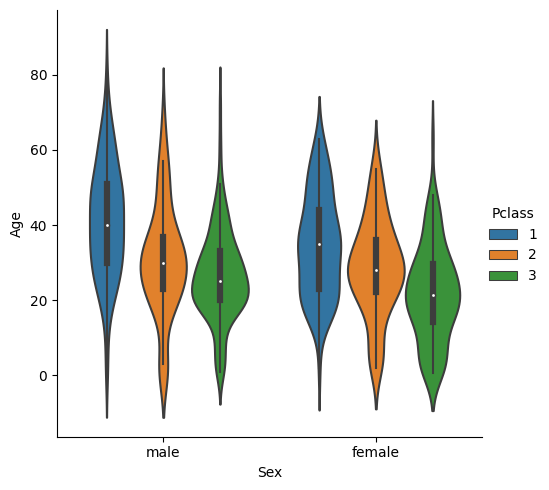

In [14]:
sns.catplot(data=train,x='Sex',y='Age',hue='Pclass',kind='violin')
plt.show()

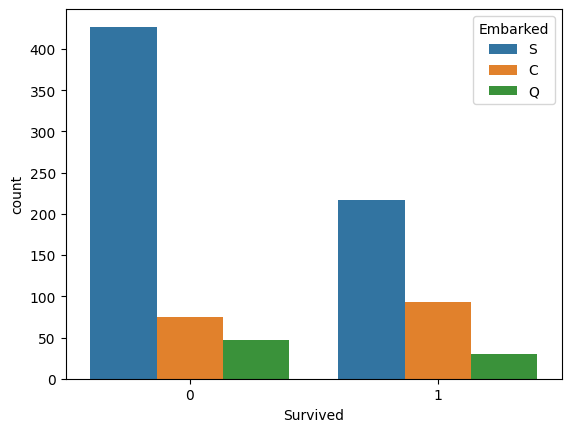

In [15]:
sns.countplot(data=train,x='Survived',hue='Embarked')
plt.show()

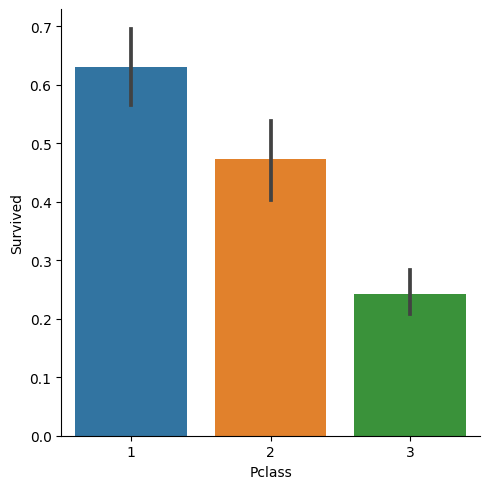

In [16]:
sns.catplot(data=train,x='Pclass',y='Survived',kind='bar')
plt.show()

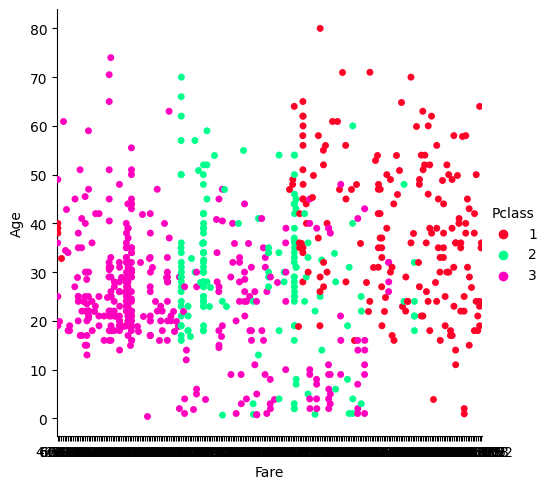

In [17]:
sns.catplot(data=train,x='Fare',y='Age',hue='Pclass',palette='gist_rainbow')
plt.show()

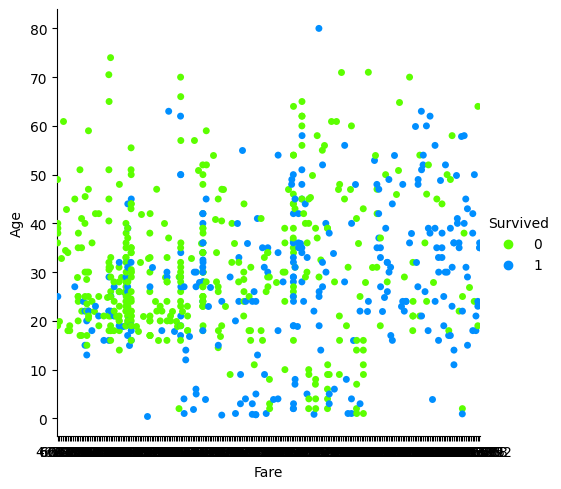

In [18]:
sns.catplot(data=train,x='Fare',y='Age',hue='Survived',palette='gist_rainbow')
plt.show()

# Step 3:Data preprocessing 

In [19]:
train=train[['Name','Pclass','Sex','Age','Survived']]
test=test[['Name','Pclass','Sex','Age','Survived']]

In [20]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

Name          0
Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

Name        0
Pclass      0
Sex         0
Age         2
Survived    0
dtype: int64


In [21]:
train['Age'].fillna(train["Age"].mean(),inplace=True)
test['Age'].fillna(test["Age"].mean(),inplace=True)

In [22]:
train['Sex']=train["Sex"].map({'male':0,'female':1})
test['Sex']=test["Sex"].map({'male':0,'female':1})


In [23]:
train.shape

(891, 5)

In [24]:
test.shape

(21, 5)

In [25]:
X_train=train.values[:870,1:-1]
y_train=train.values[:870,  -1]
y_train=y_train.astype(int)

X_test=test.values[:,1:-1]
y_test=test.values[:,  -1]
y_test=y_test.astype(int)



In [26]:
y_test.shape

(21,)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Accuracy: 0.9047619047619048
Confusion Matrix:
[[12  2]
 [ 0  7]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.78      1.00      0.88         7

    accuracy                           0.90        21
   macro avg       0.89      0.93      0.90        21
weighted avg       0.93      0.90      0.91        21



In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8095238095238095


In [30]:

# Step 1: Define and train the KNN model
model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train_scaled, y_train)  # Assuming you have defined x_train_scale and y_train

# Step 2: Predict using the model
y_pred = model_KNN.predict(X_test_scaled )  # Assuming you have defined X_test_scale

# Rest of the evaluation code


In [31]:

# Step 1: Predict using the model
y_pred = model_KNN.predict(X_test_scaled)  # Assuming you have defined and trained your KNN model

# Step 2: Compute confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Step 3: Print confusion matrix
print("Confusion Matrix:")
print(cf_matrix)

# Step 4: Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Compute and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)


Confusion Matrix:
[[11  3]
 [ 1  6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.67      0.86      0.75         7

    accuracy                           0.81        21
   macro avg       0.79      0.82      0.80        21
weighted avg       0.83      0.81      0.81        21

Accuracy of the model: 0.8095238095238095


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Step 1: Predict using the model
y_pred = model_KNN.predict(X_train_scaled)  # Assuming you have defined and trained your KNN model

# Step 2: Compute confusion matrix
cf_matrix = confusion_matrix(y_train, y_pred)

# Step 3: Print confusion matrix
print("Confusion Matrix:")
print(cf_matrix)

# Step 4: Print classification report
print("Classification Report:")
print(classification_report(y_train, y_pred))

# Step 5: Compute and print accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy of the model:", accuracy)


Confusion Matrix:
[[481  54]
 [103 232]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       535
           1       0.81      0.69      0.75       335

    accuracy                           0.82       870
   macro avg       0.82      0.80      0.80       870
weighted avg       0.82      0.82      0.82       870

Accuracy of the model: 0.8195402298850575


In [33]:
acc_dict = dict()

for K in range(1, 31):
    model_KNN = KNeighborsClassifier(n_neighbors=K, metric='euclidean')
    model_KNN.fit(X_train_scaled, y_train)
    y_pred = model_KNN.predict(X_train_scaled)
    acc_score = round(accuracy_score(y_train, y_pred), 2)
    print('Accuracy for K = {}: {}'.format(K, acc_score))
    acc_dict[K] = acc_score


Accuracy for K = 1: 0.84
Accuracy for K = 2: 0.85
Accuracy for K = 3: 0.85
Accuracy for K = 4: 0.84
Accuracy for K = 5: 0.85
Accuracy for K = 6: 0.84
Accuracy for K = 7: 0.84
Accuracy for K = 8: 0.84
Accuracy for K = 9: 0.83
Accuracy for K = 10: 0.83
Accuracy for K = 11: 0.83
Accuracy for K = 12: 0.82
Accuracy for K = 13: 0.82
Accuracy for K = 14: 0.81
Accuracy for K = 15: 0.82
Accuracy for K = 16: 0.82
Accuracy for K = 17: 0.82
Accuracy for K = 18: 0.82
Accuracy for K = 19: 0.82
Accuracy for K = 20: 0.82
Accuracy for K = 21: 0.83
Accuracy for K = 22: 0.82
Accuracy for K = 23: 0.81
Accuracy for K = 24: 0.81
Accuracy for K = 25: 0.82
Accuracy for K = 26: 0.8
Accuracy for K = 27: 0.8
Accuracy for K = 28: 0.8
Accuracy for K = 29: 0.81
Accuracy for K = 30: 0.81


In [34]:
for k in acc_dict:
    if acc_dict[k] == max(acc_dict.values()):
        print(k,':',acc_dict[k])

2 : 0.85
3 : 0.85
5 : 0.85


In [35]:

model = KNeighborsClassifier(n_neighbors=5, metric='euclidean',n_jobs=-1)
model.fit(X_train_scaled, y_train)  


y_pred = model.predict(X_test_scaled )  



In [36]:


# Step 2: Compute confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Step 3: Print confusion matrix
print("Confusion Matrix:")
print(cf_matrix)

# Step 4: Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Compute and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)


Confusion Matrix:
[[11  3]
 [ 0  7]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.70      1.00      0.82         7

    accuracy                           0.86        21
   macro avg       0.85      0.89      0.85        21
weighted avg       0.90      0.86      0.86        21

Accuracy of the model: 0.8571428571428571


In [37]:
# Step 1: Predict using the model
y_pred = model.predict(X_train_scaled)  # Assuming you have defined and trained your KNN model

# Step 2: Compute confusion matrix
cf_matrix = confusion_matrix(y_train, y_pred)

# Step 3: Print confusion matrix
print("Confusion Matrix:")
print(cf_matrix)

# Step 4: Print classification report
print("Classification Report:")
print(classification_report(y_train, y_pred))

# Step 5: Compute and print accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy of the model:", accuracy)


Confusion Matrix:
[[489  46]
 [ 87 248]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       535
           1       0.84      0.74      0.79       335

    accuracy                           0.85       870
   macro avg       0.85      0.83      0.83       870
weighted avg       0.85      0.85      0.84       870

Accuracy of the model: 0.8471264367816091
